In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt

# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 2.0
min_samples = 22
cluster_method = 'xi'
metric = 'minkowski'

# Generate data
#X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)
X, y = make_blobs(n_samples=num_samples_total, centers=cluster_centers, cluster_std=[1.0, 0.5], random_state=42)

# Compute OPTICS
db = OPTICS(max_eps=epsilon, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title(f'OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

ValueError: Metric 'euclid' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

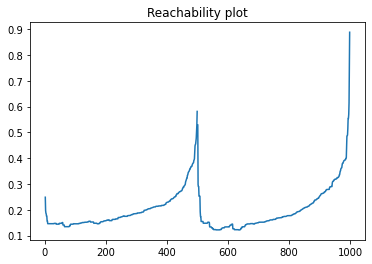

In [2]:
# Generate reachability plot
reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

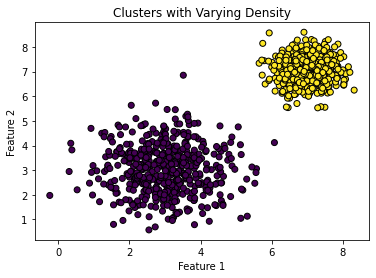

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Create clusters with varying density
X, y = make_blobs(n_samples=num_samples_total, centers=cluster_centers, cluster_std=[1.0, 0.5], center_box=(0,1), random_state=42)

# Plot the generated clusters
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Clusters with Varying Density')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
